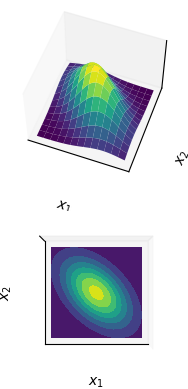

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Data
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x,y)

# Multivariate Normal
mu_x = np.mean(x)
sigma_x = np.std(x)
mu_y = np.mean(y)
sigma_y = np.std(y)
rv = multivariate_normal([mu_x, mu_y], [[sigma_x, 0], [0, sigma_y]])

# Probability Density
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
pd = rv.pdf(pos)

# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, pd, cmap='viridis', linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.title("Multivariate Normal Distribution")
plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [3]:
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings("ignore")

C:\Users\18623\anaconda3\envs\transformers\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
pairs = ['grant access','revoke access','access profile',
         'add user','delete user','modify user','create user',
         'disk space','disk full', 'disk error']

In [5]:
phrase_model = SentenceTransformer("all-mpnet-base-v2")

In [6]:
embeds = phrase_model.encode(pairs)

In [7]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
x_embeds = embeds.copy()
X_transformed = pca.fit_transform(embeds)

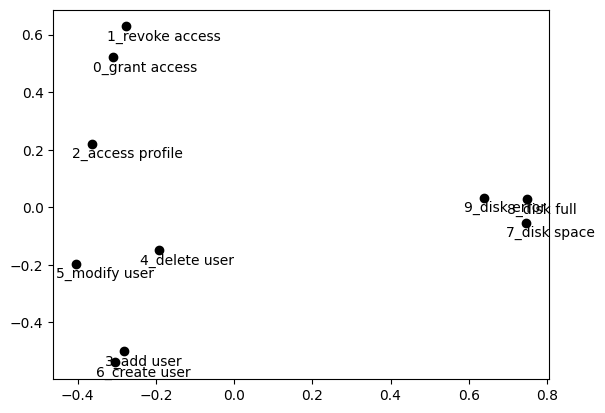

In [8]:
import matplotlib.pyplot as plt
#cent_color = ['red','green','blue']
#for key in centroid_dict.keys():
#    plt.scatter(centroid_dict[key][0],
#                centroid_dict[key][1],
#                color=cent_color[key],marker='x',s=40)
for ind in range(X_transformed.shape[0]):
    plt.scatter(X_transformed[ind,0],
                X_transformed[ind,1],
                marker='o',color='black')
    plt.text(X_transformed[ind,0]-0.05,
                X_transformed[ind,1]-0.05,
                str(ind)+'_'+pairs[ind])

In [11]:
import scipy

In [12]:
centroid_dict = {
    0: np.array([0, 0.4]),
    1: np.array([-0.2, 0.0]),
    2: np.array([0.4, -0.1]),
}

centroid_in_time = {i:[] for i in range(3)}
for key in centroid_dict:
    centroid_in_time[key].append(centroid_dict[key])

centroid_dict_in_time = {}
centroid_dict_in_time[-1] = centroid_dict.copy()
clusters_in_time = {}


iters = 3
for iter_num in range(iters):
    print(f"------------ Iteration {iter_num} -------------")

    print(">>>>>> Step 1: Assign Data Point to Clusters")
    #Step 1: cluster assigment step
    cluster_dict = {}
    for j,data_point in enumerate(X_transformed):
        #print(j,' ------ data_point',data_point)
        cent_dist = np.array([])
        for center in centroid_dict.keys():
            #print('centroid',center,centroid_dict[center])
            dist = scipy.spatial.distance.euclidean(data_point,centroid_dict[center])
            cent_dist = np.append(cent_dist,dist)
        cent_dist =  np.sqrt(cent_dist)
        #print(cent_dist)
        cluster_index = np.argmin(cent_dist)
        #print('Cluster index',cluster_index)
        if cluster_index in cluster_dict:
            cluster_dict[cluster_index].append(j)
        else:
            cluster_dict[cluster_index] = [j]
            
    clusters_in_time[iter_num] = cluster_dict.copy()

    print(">>>>>> Step 2: Update centroids")
    #Step 2: centroid update step
    for cluster_key in cluster_dict:
        #print()
        cluster_items = cluster_dict[cluster_key]
        cluster_items = np.array(cluster_items).astype(int)
        
        new_centroid = X_transformed[cluster_items].mean(axis=0)
        #print(f"old centroid {cluster_key}: {centroid_dict[cluster_key]} new centroid {cluster_key}: {new_centroid}")
        centroid_dict[cluster_key] = new_centroid.copy()
        centroid_in_time[cluster_key].append(new_centroid.copy())
    centroid_dict_in_time[iter_num] = centroid_dict.copy()

------------ Iteration 0 -------------
>>>>>> Step 1: Assign Data Point to Clusters
>>>>>> Step 2: Update centroids
------------ Iteration 1 -------------
>>>>>> Step 1: Assign Data Point to Clusters
>>>>>> Step 2: Update centroids
------------ Iteration 2 -------------
>>>>>> Step 1: Assign Data Point to Clusters
>>>>>> Step 2: Update centroids


In [13]:
centroid_dict

{0: array([-0.316902  ,  0.45763218], dtype=float32),
 1: array([-0.29541463, -0.34578443], dtype=float32),
 2: array([0.7107882 , 0.00341351], dtype=float32)}

In [ ]:
from matplotlib import patches
#patches.Ellipse(xy, width, height, angle=0, **kwargs)

In [15]:
clust_max_dict = {}
for key in cluster_dict:
    clust_max_dict[key] = 0
    for item in cluster_dict[key]:
        dist = scipy.spatial.distance.euclidean(X_transformed[item],centroid_dict[key])
        #dist = np.sqrt(dist) 
        if dist > clust_max_dict[key]:
            clust_max_dict[key] = dist

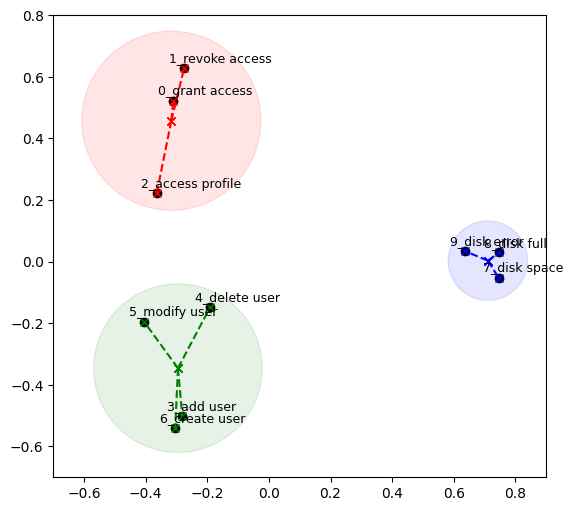

In [16]:
figure, axes = plt.subplots(figsize=(12,6))
#plt.figure()

for i in range(X_transformed.shape[0]):
    plt.scatter(X_transformed[i,0],
                X_transformed[i,1],
                marker='o',
                color="black")
    
    plt.text(X_transformed[i,0]-0.05,
             X_transformed[i,1]+0.02, 
             str(i)+"_"+pairs[i],
             fontsize=9
            )

clust_colors = ['red','green','blue']
for clust_key in cluster_dict.keys():
    cluster_list = cluster_dict[clust_key]
    for item in cluster_list:
        plt.plot([centroid_dict[clust_key][0],X_transformed[item,0]],
                 [centroid_dict[clust_key][1],X_transformed[item,1]],
                 color=clust_colors[clust_key],
                 linestyle='dashed',
                 marker='x')
        
for i,center in enumerate(centroid_dict):
   Drawing_colored_circle = plt.Circle((centroid_dict[center][0],centroid_dict[center][1]), 
                                       clust_max_dict[center]+0.05, 
                                       color=clust_colors[i],
                                       alpha=0.1 )
   axes.set_aspect( 1 )
   axes.add_artist( Drawing_colored_circle )
plt.xlim([-0.7,0.9])
plt.ylim([-0.7,0.8])
#plt.title( 'Colored Circle' )
plt.show() 

In [69]:
var_dict = {}
corr_dict = {}
cov_dict = {}
data_dict = {}
for cluster_key in clusters_in_time[2]:
    #print()
    cluster_items = cluster_dict[cluster_key]
    cluster_items = np.array(cluster_items).astype(int)
    cluster_array = X_transformed[cluster_items]
    data_dict[cluster_key] = cluster_array
    cr = np.corrcoef(cluster_array[:,0],cluster_array[:,1])
    cov_dict[cluster_key] = np.cov(cluster_array[:,0],cluster_array[:,1],ddof=0)
    corr_dict[cluster_key] = cr[0,1]
    mu = X_transformed[cluster_items].mean(axis=0)
    std = X_transformed[cluster_items].var(axis=0)
    var_dict[cluster_key] = std#np.sqrt(std)

In [70]:
cov_dict

{0: array([[0.00133863, 0.00623302],
        [0.00623302, 0.02972324]]),
 1: array([[0.00580289, 0.00092996],
        [0.00092996, 0.03077862]]),
 2: array([[ 0.0026509 , -0.00107438],
        [-0.00107438,  0.00160609]])}

In [71]:
var_dict

{0: array([0.00133863, 0.02972324], dtype=float32),
 1: array([0.00580289, 0.03077862], dtype=float32),
 2: array([0.0026509 , 0.00160609], dtype=float32)}

In [72]:
cluster_array

array([[ 0.7462594 , -0.05321991],
       [ 0.7481224 ,  0.02982495],
       [ 0.63798267,  0.0336355 ]], dtype=float32)

In [73]:
cr = np.corrcoef(cluster_array[:,0],cluster_array[:,1])
(cr[0,1]+1)*360

172.55331294243283

In [74]:
corr_dict

{0: 0.9881451960897047, 1: 0.0695854372082958, 2: -0.5206852418265755}

In [76]:
var_dict

{0: array([0.00133863, 0.02972324], dtype=float32),
 1: array([0.00580289, 0.03077862], dtype=float32),
 2: array([0.0026509 , 0.00160609], dtype=float32)}

In [18]:
clusters_in_time

{0: {0: [0, 1], 1: [2, 3, 4, 5, 6], 2: [7, 8, 9]},
 1: {0: [0, 1, 2], 1: [3, 4, 5, 6], 2: [7, 8, 9]},
 2: {0: [0, 1, 2], 1: [3, 4, 5, 6], 2: [7, 8, 9]}}

In [21]:
std

array([0.0026509 , 0.00160609], dtype=float32)

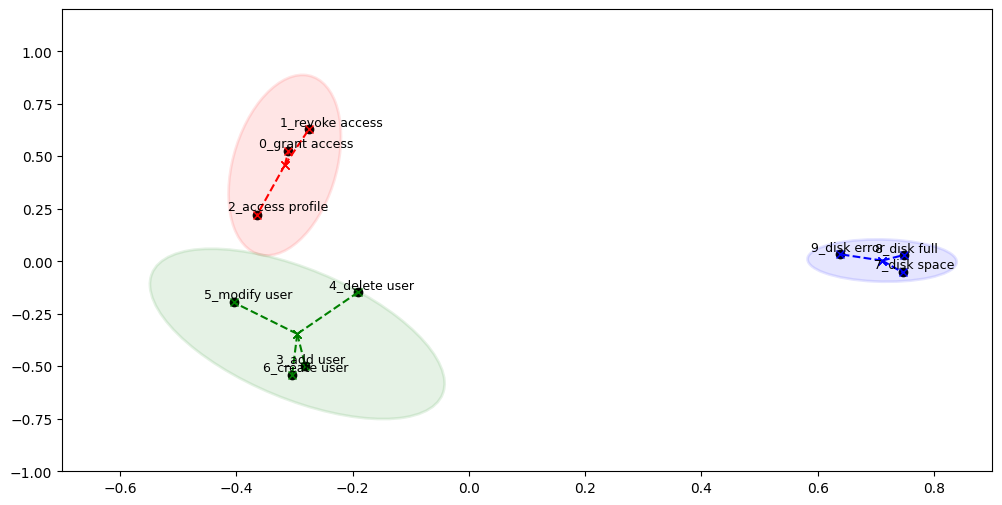

In [50]:
from matplotlib import patches
figure, axes = plt.subplots(figsize=(12,6))
#plt.figure()

for i in range(X_transformed.shape[0]):
    plt.scatter(X_transformed[i,0],
                X_transformed[i,1],
                marker='o',
                color="black")
    
    plt.text(X_transformed[i,0]-0.05,
             X_transformed[i,1]+0.02, 
             str(i)+"_"+pairs[i],
             fontsize=9
            )

clust_colors = ['red','green','blue']
for clust_key in cluster_dict.keys():
    cluster_list = cluster_dict[clust_key]
    for item in cluster_list:
        plt.plot([centroid_dict[clust_key][0],X_transformed[item,0]],
                 [centroid_dict[clust_key][1],X_transformed[item,1]],
                 color=clust_colors[clust_key],
                 linestyle='dashed',
                 marker='x')
        
for i,center in enumerate(centroid_dict):
   scale = 5
   Drawing_colored_ellipse = patches.Ellipse(xy=(centroid_dict[center][0],centroid_dict[center][1]), 
                                             width=scale*var_dict[center][0], 
                                             height=scale*var_dict[center][1],
                                             angle=(corr_dict[center]+1)*360,
                                             #edgecolor='r', 
                                             #fc='None', 
                                             lw=2,
                                             color=clust_colors[i],
                                             alpha=0.1
                                            )
    
   #axes.set_aspect(1)
   axes.add_artist(Drawing_colored_ellipse)
plt.xlim([-0.7,0.9])
plt.ylim([-1,1.2])
#plt.title( 'Colored Circle' )
plt.show() 

In [132]:
def multi_norm(z, mu, Sig):
    """
    The density function of multivariate normal distribution.

    Parameters
    ---------------
    z: ndarray(float, dim=2)
        random vector, N by 1
    μ: ndarray(float, dim=1 or 2)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1
    """

    print('z shape',z.shape, 'z value',z)
    print('mu shape',mu.shape, 'mu value', mu)
    zmu = z - mu
    print('zmu.shape',zmu.shape,"zmu value",zmu)
    zmut = zmu.T
    print('zmut.shape',zmut.shape,'zmu.T',zmut)

    print('Sig',Sig)
    
    invSig = np.linalg.inv(Sig)
    print('invSig shape',invSig.shape,'invSig',invSig)

    print(Sig @ invSig,np.allclose(Sig @ invSig, np.eye(2)))

    
    det_mult = np.linalg.det(Sig) ** (-1/2)
    
    z = np.atleast_2d(z)
    mu = np.atleast_2d(mu)
    Sig = np.atleast_2d(Sig)

    N = z.shape[0]

    temp1 = np.linalg.det(Sig) ** (-1/2)
    #temp2 = np.exp(-.5 * (z - mu).T @ np.linalg.inv(Sig) @ (z - mu))

    temp1 = np.sqrt(np.linalg.det(Sig))
    print('temp1 shape',temp1.shape,'temp1',temp1)
    temp2 = np.exp(-.5 * zmut @ invSig @ zmu)
    print('temp2 shape',temp2.shape,'temp2',temp2)
    
    prob = det_mult*np.exp(- temp2/2 )
    print('prob shape',prob.shape)
    print('prob ',prob)

    return (2 * np.pi) ** (-N/2) * prob

In [133]:
cluster_array = data_dict[0]

In [134]:
cluster_array

array([[-0.31082678,  0.52309245],
       [-0.2754395 ,  0.62830085],
       [-0.36443973,  0.22150323]], dtype=float32)

In [135]:
multi_norm(cluster_array[0,:],
           centroid_dict[0],
           cov_dict[0]
          )

z shape (2,) z value [-0.31082678  0.52309245]
mu shape (2,) mu value [-0.316902    0.45763218]
zmu.shape (2,) zmu value [0.00607523 0.06546026]
zmut.shape (2,) zmu.T [0.00607523 0.06546026]
Sig [[0.00133863 0.00623302]
 [0.00623302 0.02972324]]
invSig shape (2, 2) invSig [[31695.5126368  -6646.61216232]
 [-6646.61216232  1427.45152264]]
[[ 1.00000000e+00 -1.28573091e-15]
 [ 2.36323325e-14  1.00000000e+00]] True
temp1 shape () temp1 0.0009683875320610879
temp2 shape () temp2 0.367880521434411
prob shape ()
prob  859.1452048010964


342.7493471993053

In [146]:
def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [153]:
pdf_multivariate_gauss(np.expand_dims(cluster_array[0,:],axis=-1),
           np.expand_dims(centroid_dict[0],axis=-1),
           cov_dict[0]
          )

60.46133548301096

In [149]:
centroid_dict[0].shape

(2,)

In [154]:
def test_gauss_pdf():
    x = np.array([[0],[0]])
    mu  = np.array([[0],[0]])
    cov = np.eye(2) 

    print(pdf_multivariate_gauss(x, mu, cov))

In [155]:
test_gauss_pdf()

0.15915494309189535


In [2]:
cov_dict = {0: np.array([[0.00133863, 0.00623302],
        [0.00623302, 0.02972324]]),
 1: np.array([[0.00580289, 0.00092996],
        [0.00092996, 0.03077862]]),
 2: np.array([[ 0.0026509 , -0.00107438],
        [-0.00107438,  0.00160609]])}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
cov_dict[0]

array([[0.00133863, 0.00623302],
       [0.00623302, 0.02972324]])

In [5]:
centroid_dict = {
    0: np.array([0, 0.4]),
    1: np.array([-0.2, 0.0]),
    2: np.array([0.4, -0.1]),
}

In [6]:
multivariate_normal.pdf(list( centroid_dict[0]),#list(cluster_array[0,:]),
                        list( centroid_dict[0]),
                        cov_dict[0])

164.34100145874712

In [7]:
data_point = [-0.31082678,  0.52309245]

In [8]:
multivariate_normal.pdf(data_point,
                        list( centroid_dict[0]),
                        cov_dict[0])

0.0

In [159]:
np.expand_dims(centroid_dict[0],axis=-1).T.shape

(1, 2)

In [188]:
multivariate_normal.pdf(X_transformed[0],
                        list( centroid_dict[0]),
                        cov_dict[0]
                        #np.array([[0.1,0],[0,0.1]])
                       )

60.46133548301102

In [207]:
gm_clusters_dict = {i:[] for i in [0,1,2]}
for j,data_point in enumerate(X_transformed):
    print(j+1,'Data point', data_point)
    prob_list = []
    for key in centroid_dict:
       prob =  multivariate_normal.pdf(data_point,
                                       centroid_dict[key],
                                       cov_dict[key]
                                #np.array([[0.1,0],[0,0.1]])
                               )
       prob_list.append(prob)
       print(f'{prob} of {data_point} vs. centroid {key}')
    
    prob_array = np.array(prob_list)
    ind = np.argmax(prob_list)
    gm_clusters_dict[ind].append(j)
    print(f'point {data_point} belongs to cluster {ind} with centroid {centroid_dict[ind]}')
    print('-------------------')

1 Data point [-0.31082678  0.52309245]
60.46133548301102 of [-0.31082678  0.52309245] vs. centroid 0
4.846177128594818e-05 of [-0.31082678  0.52309245] vs. centroid 1
2.4671639057809758e-86 of [-0.31082678  0.52309245] vs. centroid 2
point [-0.31082678  0.52309245] belongs to cluster 0 with centroid [-0.316902    0.45763218]
-------------------
2 Data point [-0.2754395   0.62830085]
60.46103074597117 of [-0.2754395   0.62830085] vs. centroid 0
2.3952881631525347e-06 of [-0.2754395   0.62830085] vs. centroid 1
7.524436216967035e-88 of [-0.2754395   0.62830085] vs. centroid 2
point [-0.2754395   0.62830085] belongs to cluster 0 with centroid [-0.316902    0.45763218]
-------------------
3 Data point [-0.36443973  0.22150323]
60.46110759488197 of [-0.36443973  0.22150323] vs. centroid 0
0.03367425356783537 of [-0.36443973  0.22150323] vs. centroid 1
2.905080335784159e-102 of [-0.36443973  0.22150323] vs. centroid 2
point [-0.36443973  0.22150323] belongs to cluster 0 with centroid [-0.316

In [202]:
clusters_in_time[2]

{0: [0, 1, 2], 1: [3, 4, 5, 6], 2: [7, 8, 9]}

In [203]:
gm_clusters_dict

{0: [0, 1, 2], 1: [3, 4, 5, 6], 2: [7, 8, 9]}

In [189]:
centroid_dict[0]

array([-0.316902  ,  0.45763218], dtype=float32)

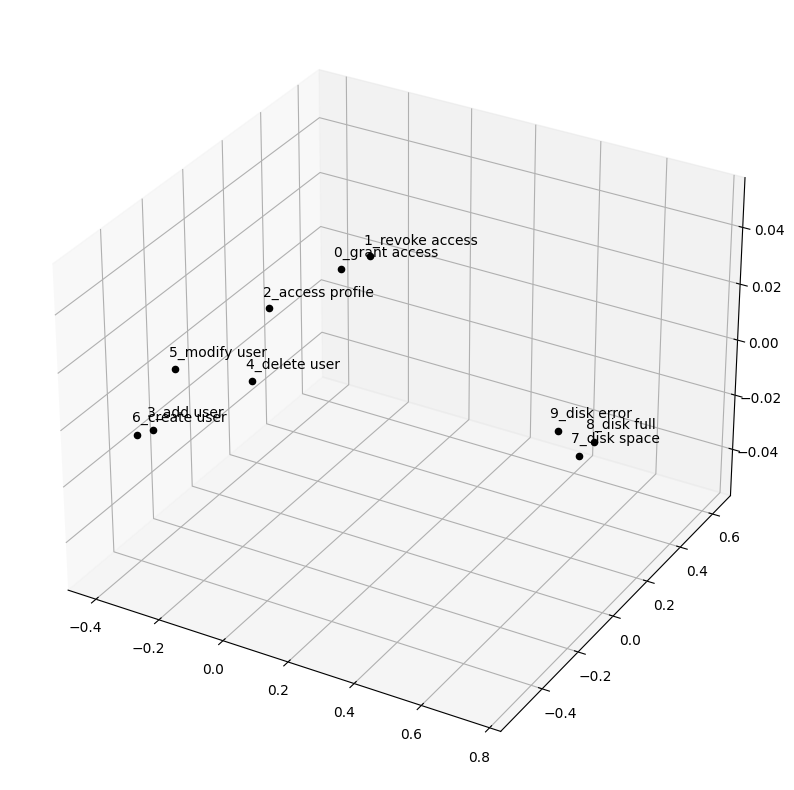

In [234]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

for ind in range(X_transformed.shape[0]):
    ax.scatter(X_transformed[ind,0],
                X_transformed[ind,1],
                0,
                marker='o',color='black')
    ax.text(x = X_transformed[ind,0]-0.05,
            y = X_transformed[ind,1]+0.05,
            z = 0,
            s = str(ind)+'_'+pairs[ind]
           )


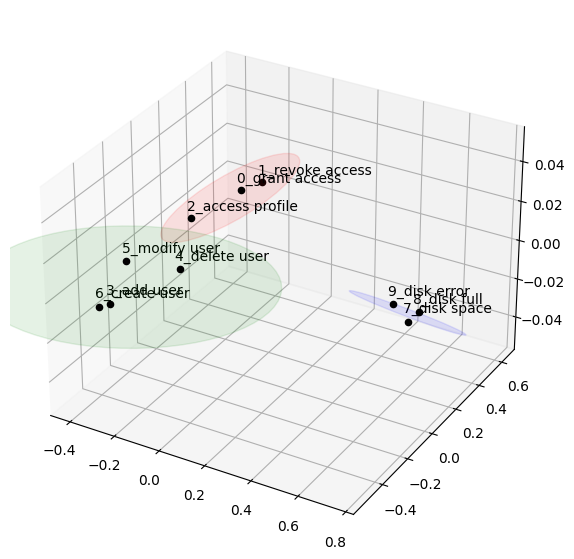

In [279]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')

for ind in range(X_transformed.shape[0]):
    ax.scatter(X_transformed[ind,0],
                X_transformed[ind,1],
                0,
                marker='o',color='black')
    ax.text(x = X_transformed[ind,0]-0.05,
            y = X_transformed[ind,1]+0.05,
            z = 0,
            s = str(ind)+'_'+pairs[ind]
           )
    
#p = patches.Circle((0, 0), 0.1)
#ellipse_dict = {}
#scale=5
#for center in centroid_dict:
#    ellipse_dict[center] = patches.Ellipse(xy=(centroid_dict[center][0],centroid_dict[center][1]),
#                                                        width=scale*var_dict[center][0],
#                                                        height=scale*var_dict[center][1],
#                                                        angle=(corr_dict[center]+1)*360,
#                                                        lw=2,
#                                                        color=clust_colors[center],
#                                                        alpha=0.1
#                                                       )
#p = patches.Ellipse((0, 0), 0.2, 0.1)
#    ax.add_patch(ellipse_dict[center])
#    art3d.pathpatch_2d_to_3d(ellipse_dict[center], 
#                             z=0, 
#                             zdir="z")

for center in [0,1,2]:
    p = patches.Ellipse((centroid_dict[center][0],centroid_dict[center][1]), 
                        200*var_dict[center][0], 
                        30*var_dict[center][1],
                        (corr_dict[center]+1)*360,
                        color=clust_colors[center],
                        alpha=0.1
                       )
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, 
                                 z=0, 
                                 zdir="z")
plt.show()
    
#for center in centroid_dict:
    #Drawing_colored_ellipse = patches.Ellipse(xy=(centroid_dict[center][0],centroid_dict[center][1]),
    #                                                    width=scale*var_dict[center][0],
    #                                                    height=scale*var_dict[center][1],
    #                                                    angle=(corr_dict[center]+1)*360,
    #                                                    lw=2,
    #                                                    color=clust_colors[center],
    #                                                    alpha=0.1
    #                                                   )
    #ax.add_patch(Drawing_colored_ellipse)
#art3d.pathpatch_2d_to_3d(Drawing_colored_ellipse, 
#                             z=0, 
#                             zdir="z")
plt.show()

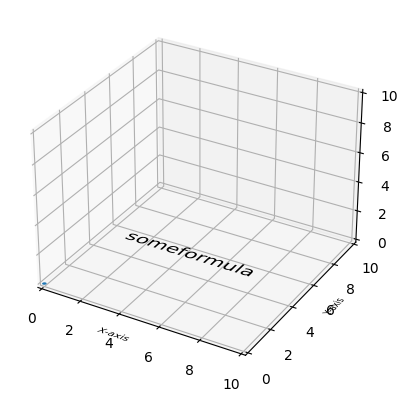

In [245]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    """
    Plots the string *s* on the Axes *ax*, with position *xyz*, size *size*,
    and rotation angle *angle*. *zdir* gives the axis which is to be treated as
    the third dimension. *usetex* is a boolean indicating whether the string
    should be run through a LaTeX subprocess or not.  Any additional keyword
    arguments are forwarded to `.transform_path`.

    Note: zdir affects the interpretation of xyz.
    """
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((0, 0), 0.1)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

# Manually label the axes
text3d(ax, (4, -2, 0), "X-axis", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (12, 4, 0), "Y-axis", zdir="z", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")
text3d(ax, (12, 10, 4), "Z-axis", zdir="y", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")

# Write a Latex formula on the z=0 'floor'
text3d(ax, (1, 5, 0),
       #r"$\displaystyle G_{\mu\nu} + \Lambda g_{\mu\nu} = "
       #r"\frac{8\pi G}{c^4} T_{\mu\nu}  $",
       "someformula",
       zdir="z", size=1, usetex=False,
       ec="none", fc="k")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()